In [1]:
import sys 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
from os.path import basename
from re import sub
import import_ipynb
from SimpleSource_TRAK_tools_2 import *
import subprocess
import statistics
from SimpleSource_TRAK_build_analyze_tools_2 import *
import matplotlib
import time

importing Jupyter notebook from SimpleSource_TRAK_tools_2.ipynb
importing Jupyter notebook from SimpleSource_TRAK_build_analyze_tools_2.ipynb


### Build Simulations: 
#### 1. Build base simulation
#### 2. Build loop simulations over demit and avg 

In [2]:
## BUILD base simulation defintions: 
## inputs changing depending on optimization results: 
#fe_x = sys.argv[1]
#fe_y = sys.argv[2]
#an_x = sys.argv[3]
#an_y = sys.argv[4]
#subdir = sys.argv[5]

fe_x = 34
fe_y = 27   # +3 from the cathode surface emission! 
an_x = 77
an_y = 30
subdir = 'simple_source_17_03_2024_COPY4'
#60

fe_x_str = str(fe_x).replace('.', '')
fe_y_str = str(fe_y).replace('.', '')
an_x_str = str(an_x).replace('.', '')
an_y_str = str(an_y).replace('.', '')


## constant inputs:
## inputs for getting estat solution
meshfile_estat = '%s/mesh_%s_%s_%s_%s' %(subdir, fe_x_str, fe_y_str, an_x_str, an_y_str) # define mesh file for estat
estatfile = '%s/estat_%s_%s_%s_%s' %(subdir, fe_x_str, fe_y_str, an_x_str, an_y_str) # define estat file 
potential = '-1.36E+03' # define the potential for the estat solution

## inputs for getting permag solution
meshfile_permag = '%s/mesh_permag' %subdir # define the mesh file for permag
permagfile = '%s/permag' %subdir # define permag file

## inputs for getting TRAK base solution
trakfile = '%s/firstfile' %subdir

In [3]:
# Getting estat solution: 
# create and run files (.min, .mls, .mou, .ein, .els, .eou)
run_mesh_estat(fe_x, fe_y, an_x, an_y, meshfile_estat)  # make and run the mesh for estat
run_estat(estatfile, meshfile_estat, potential) # make and run the .ein file for estat

In [4]:
# Getting permag solution:
# create and run files (.min, .mls, .mou, .pin, .pls, .pou)
run_mesh_permag(meshfile_permag) # make and run the mesh for permag
run_permag(permagfile, meshfile_permag) # make and run the .pin for permag

In [5]:
# Getting TRAK base solution:
# create and run files (.tin, .tls, .tou)
run_trak(estatfile, permagfile, trakfile)

In [3]:
## Cartesian product of avg and demit 
avg_list = ['0.08', '0.14', '0.20', '0.26']
demit_list = ['0.15', '0.25','0.35', '0.45']

# avg_list = ['0.08', '0.24']
# demit_list = ['0.10', '0.30']
#avg_list = ['0.08']
#demit_list = ['0.20']  # 0.16 from the increase in the mesh sizing 
file_list = []
for i in avg_list: 
    avg_float = float(i)
    avg_file = i.replace('.', '')
    for j in demit_list: 
        demit_float = float(j)
        demit_file = j.replace('.', '')
        avg_demit_ncycle_func('%s' %trakfile,
                              '%s/a%sd%s_%s_%s_%s_%s' %(subdir, avg_file, demit_file, fe_x_str, fe_y_str, an_x_str, an_y_str), 
                             avg_float, demit_float, 70)
        file_list.append('%s/a%sd%s_%s_%s_%s_%s' %(subdir, avg_file, demit_file, fe_x_str, fe_y_str, an_x_str, an_y_str))
        
print(file_list)
print(len(file_list))

['simple_source_17_03_2024_COPY4/a008d015_34_27_77_30', 'simple_source_17_03_2024_COPY4/a008d025_34_27_77_30', 'simple_source_17_03_2024_COPY4/a008d035_34_27_77_30', 'simple_source_17_03_2024_COPY4/a008d045_34_27_77_30', 'simple_source_17_03_2024_COPY4/a014d015_34_27_77_30', 'simple_source_17_03_2024_COPY4/a014d025_34_27_77_30', 'simple_source_17_03_2024_COPY4/a014d035_34_27_77_30', 'simple_source_17_03_2024_COPY4/a014d045_34_27_77_30', 'simple_source_17_03_2024_COPY4/a020d015_34_27_77_30', 'simple_source_17_03_2024_COPY4/a020d025_34_27_77_30', 'simple_source_17_03_2024_COPY4/a020d035_34_27_77_30', 'simple_source_17_03_2024_COPY4/a020d045_34_27_77_30', 'simple_source_17_03_2024_COPY4/a026d015_34_27_77_30', 'simple_source_17_03_2024_COPY4/a026d025_34_27_77_30', 'simple_source_17_03_2024_COPY4/a026d035_34_27_77_30', 'simple_source_17_03_2024_COPY4/a026d045_34_27_77_30']
16


In [8]:
run_parallel(file_list, '3', 'TRAK')

NameError: name 'run_parallel' is not defined

### Analyze Simulations: 
#### 1. Analyze simulations from demit loops 
#### 2. Analyze simulations from avg loops 
#### 3. Combine them for total output of average current and flatness (check on how to do this)

In [1]:
### Will want to figure out how to go through this analysis part for this setup!!! 

[['simple_source_17_03_2024_COPY4/a008d015_34_27_77_30', True, 0.0039433], ['simple_source_17_03_2024_COPY4/a008d025_34_27_77_30', True, 0.003777], ['simple_source_17_03_2024_COPY4/a008d035_34_27_77_30', True, 0.0038768], ['simple_source_17_03_2024_COPY4/a008d045_34_27_77_30', True, 0.004035], ['simple_source_17_03_2024_COPY4/a014d015_34_27_77_30', True, 0.0038867], ['simple_source_17_03_2024_COPY4/a014d025_34_27_77_30', True, 0.0037914], ['simple_source_17_03_2024_COPY4/a014d035_34_27_77_30', True, 0.003985], ['simple_source_17_03_2024_COPY4/a014d045_34_27_77_30', True, 0.0040724], ['simple_source_17_03_2024_COPY4/a020d015_34_27_77_30', True, 0.0040054], ['simple_source_17_03_2024_COPY4/a020d025_34_27_77_30', True, 0.0039186], ['simple_source_17_03_2024_COPY4/a020d035_34_27_77_30', True, 0.0040443], ['simple_source_17_03_2024_COPY4/a020d045_34_27_77_30', True, 0.0038339], ['simple_source_17_03_2024_COPY4/a026d015_34_27_77_30', True, 0.0038903], ['simple_source_17_03_2024_COPY4/a026d02

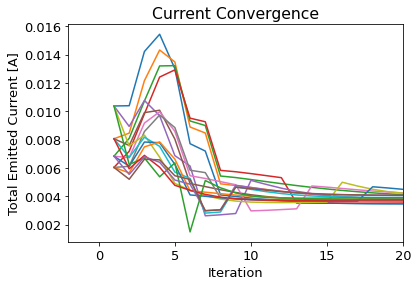

I = 0.0039 ± 0.0001 A


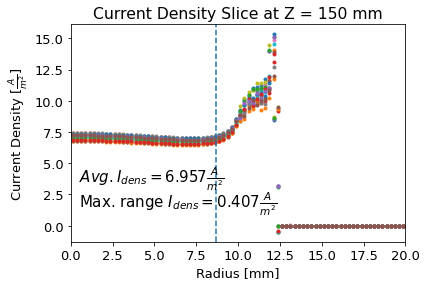

current density mean:  6.95668125 A/m^2
max Jz range:  0.4068 A/m^2


In [9]:
#time.sleep(60) # Sleep for 60 seconds
conv_condition = 0.06
density_slice = 150
radius = 8.7

plt.rcParams['font.size'] = '13'

# get list of files where the current converges. 
convergence = converg_func(file_list, conv_condition)
converging_file_list = convergence[1]
print(len(converging_file_list))

# get and plot the current convergence of the converging simulations 
current_list = []
converging_list_base = []
for i in converging_file_list: 
    converging_list_base.append(i[0])
    current_list.append(current_conv(i[0]))
    plt.legend().remove()
    
mean = np.mean(current_list)
stdev = np.std(current_list)
plt.xlim(-2, 20)
plt.show()
print('I = %.4f \u00B1 %.4f A' %(mean, stdev))

## do the flatness analysis
flatness_analysis = flatness(converging_list_base, density_slice, radius)
cdens_list = []
Jz_range_list = []
for i in flatness_analysis: 
    cdens_list.append(i[1])
    Jz_range_list.append(i[2])

cdens_avg = np.mean(cdens_list)
Jz_range_max = max(Jz_range_list)
    
## Get and plot the current density of the converging simulations
for i in converging_file_list: 
   cdensity(i[0], density_slice)
plt.xlim(0, 20)
plt.axvline(8.7, ls = '--')
plt.text(0.5, 3.5, r'$Avg. I_{dens} = %.3f \frac{A}{m^2} $' %(cdens_avg), fontsize = 15)
plt.text(0.5, 1.5, r'Max. range $I_{dens} = %.3f \frac{A}{m^2} $' %(Jz_range_max), fontsize = 15)
plt.title('Current Density Slice at Z = 150 mm')
plt.show()

# ## do the flatness analysis
# flatness_analysis = flatness(converging_list_base, density_slice, radius)
# cdens_list = []
# Jz_range_list = []
# for i in flatness_analysis: 
#     cdens_list.append(i[1])
#     Jz_range_list.append(i[2])

# cdens_avg = np.mean(cdens_list)
# Jz_range_max = max(Jz_range_list)

print("current density mean: ", cdens_avg, 'A/m^2')
print("max Jz range: ", Jz_range_max,  'A/m^2')

# ##### Getting the electric field results! ########
# E_field_line_loc = [-10, 0, 1.5, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 10, 33.5, 33.8, 34.1, 34.4, 34.7, 35.0, 35.3]
# print(converging_file_list)
# max_e_fields = []
# for i in converging_file_list:
#     for val in E_field_line_loc:
#         max_e_field_output = E_field_line(i[0], val, plots = False)
#         max_e_fields.append([max_e_field_output, val])
        
# def Extract(first):
#     return [item[0] for item in first]
 
# print(max_e_fields)
# max_field_sim = max(Extract(max_e_fields))
# print('maximum electric field calculated: ', max_field_sim)

# for i in max_e_fields: 
#     print(i)
#     if max_field_sim in i[0]: 
#        print('max field and slice: ')
#        print(i)

In [7]:
## additional electric field analysis: get the electric field histogram and such 
E_field_line_loc = [-25, -20, -15, -10, 0, 10, 15, 20, 25, 30, 31, 32, 33, 34, 35, 40, 45, 50, 55, 60, 65, 70]
#E_field_line_loc = [25]
#E_field_line_loc = [-10, 0, 1.5, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 10, 33.5, 33.8, 34.1, 34.4, 34.7, 35.0, 35.3]
max_e_fields = []
e_field_values = []
for i in converging_file_list:
    for val in E_field_line_loc:
        print(val)
        max_e_field_output = E_field_line(i[0], val, plots = False)
        print(max_e_field_output)
        #max_e_fields.append([max_e_field_output, val])
        max_e_fields.append([max_e_field_output[0], val])
        e_field_values.append(max_e_field_output[1])
        
def Extract(first):
    return [item[0] for item in first]
 
print(max_e_fields)
max_field_sim = max(Extract(max_e_fields))
print('maximum electric field calculated: ', max_field_sim)



#print("Electric Field values: ", e_field_values)
e_field_list = []
for i in e_field_values: 
    for val in i: 
        e_field_list.append(val)
#print(e_field_list)
e_field_array = np.array(e_field_list)
print("99th percentile value: ", np.percentile(e_field_array, 99))
print("95th percentile value: ", np.percentile(e_field_array, 95))



-25
(132.22, [0.8362598386267273, 0.8351565752743614, 0.831894034279006, 0.8265212139443248, 0.8191742655259624, 0.8100042165322351, 0.7991907129090028, 0.786998646377489, 0.7737641840380052, 0.7598117852343433, 0.7455735945626026, 1.3759111303423635, 1.4043196924489807, 1.449109053315174, 1.4741936823904789, 1.4559550243396944, 1.407010907171654, 132.2202921869408, 127.89780123927073, 122.9896851171268, 117.89760136050268, 112.95327381218307, 108.34113528406466, 104.13492325387291, 100.33785896579616, 96.92528404786854, 93.8606401533678, 91.11211485307538, 88.64889488786649, 86.44937658791994, 84.49705803619497, 2.0079768151051945e-10, 1.890327385428249e-10, 1.8004770544497367e-10, 1.8923889095003702e-10, 2.048168240556669e-10, 2.1699123748667828e-10, 2.164056391409429e-10, 1.945233339319476e-10, 1.6415361965244628e-10, 1.3709974598444742e-10, 0.0, 0.0, 0.0])
-20
(134.07, [1.0610909236253037, 1.0591430759463047, 1.053323244327685, 1.0439478938744982, 1.031207249247211, 1.0155192314279

(133.263, [1.4597110762407746, 1.460485218249089, 1.4639086804822767, 1.4681282531195223, 1.4722719854636237, 1.4743342189625799, 1.4722672311778187, 1.4626395605890057, 1.4454025363199001, 1.4211797851433152, 1.3947505497399886, 133.26275418135407, 130.5536408159114, 127.32443859687739, 123.72346101079617, 119.89244479653419, 115.99290317622885, 112.1593659802426, 108.4830985269134, 105.01174528327772, 101.7700349582823, 98.76038160016394, 95.97955117627922, 93.41429081762597, 91.05599802698337, 88.89286714489526, 86.91787368780946, 85.12369572480038, 1.954077065624588e-10, 1.8335700274600914e-10, 1.803847566203974e-10, 1.9192486865958776e-10, 2.0799620728092617e-10, 2.175715130916729e-10, 2.1578024878333975e-10, 1.9935367491972651e-10, 1.715671275885914e-10, 1.432412708719104e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
32
(133.96, [1.4673860592563908, 1.4668379519237973, 1.4645626518278418, 1.4598741021488804, 1.4501614030513983, 1.4380553080114826, 1.4232254611972062, 1.4048308904989242, 1.

(131.25, [1.5295145991130648, 1.5197666215985268, 1.4913039004592592, 1.4485951022521788, 1.396015136194447, 1.339008358114691, 1.28165297894906, 1.2261753906917234, 1.1742632969743199, 1.1260657111376762, 1.08097203479091, 1.0384332720979235, 0.9976587585943403, 0.9579866250632105, 0.919034307847101, 0.8807947822279603, 0.8434117231222246, 0.8074592064618498, 0.7736229689583938, 0.7427992751914881, 1.3753565693666499, 1.420369682336257, 1.4732288987676017, 1.4444071038664965, 131.24952727461536, 125.49485834985431, 119.25468432413882, 113.22207576422542, 107.73379622031334, 102.88765635978885, 98.647157385502, 94.94110337514516, 91.69861800027304, 88.86075960315667, 86.3801175005568, 3.9327692304532694e-10, 4.3794713236188686e-10, 5.122362590455697e-10, 5.784274515598305e-10, 5.995971801643167e-10, 5.7968776868328e-10, 4.900138079034101e-10, 3.7570176005576545e-10, 2.7621026846408156e-10])
20
(134.07, [1.037482493587241, 1.0355998180808068, 1.0299834828330987, 1.0209325605939894, 1.00

(90.647, [90.64673657688951, 90.6063244243469, 90.48370966096606, 90.28281226235701, 90.00397415631157, 89.65275444179058, 89.23337314570149, 88.75054686592077, 88.21045178327793, 87.62031676049797, 86.98702350011753, 86.31664655789172, 85.62005379291992, 84.90243272981053, 3.915962367030613e-10, 3.951080785051098e-10, 4.1429544180451706e-10, 4.4794244652633666e-10, 4.871562274055418e-10, 5.244352867237292e-10, 5.635500110345133e-10, 5.874147967220778e-10, 6.063979975304998e-10, 6.006413016310151e-10, 5.705558530599788e-10, 5.178266984233239e-10, 4.531065585488694e-10, 3.726021906806238e-10, 3.000530663066118e-10, 2.57832112825381e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
50
(0.0, [3.895783079176766e-10, 3.8973707311854486e-10, 3.903860075668696e-10, 3.92537103087084e-10, 3.9116431448817007e-10, 3.9567810284244946e-10, 3.9867339016417936e-10, 4.028787383320197e-10, 4.119215646018062e-10, 4.276415028221653e-10, 4.3642021106383237e-10, 4.54140604246

(131.25, [1.5472701225384018, 1.5371353041368871, 1.5079199598599389, 1.464026101201751, 1.410199515175069, 1.3518683717078375, 1.2933723262576018, 1.2369312798737044, 1.1843174096567188, 1.1355232972510958, 1.090041348848749, 1.0471685786920844, 1.0060823541340937, 0.9660864480469644, 0.9267957687646184, 0.888205722453982, 0.850468175595066, 0.8141843654234585, 0.7800367552237523, 0.7489422976097692, 1.375359539538662, 1.4203722819739901, 1.4732288987676017, 1.4444071038664965, 131.24952727461536, 125.49485834985431, 119.25468432413882, 113.22207576422542, 107.73379622031334, 102.88766327621597, 98.647157385502, 94.94110337514516, 91.69861800027304, 88.86075960315667, 86.3801175005568, 3.932048125341296e-10, 4.371247510596946e-10, 5.107333517365006e-10, 5.765771645538869e-10, 5.977304700230698e-10, 5.780986788741176e-10, 4.888956183327889e-10, 3.7518329208668124e-10, 2.762323009714831e-10])
20
(134.07, [1.0462230921748956, 1.044314359520638, 1.0386490909354322, 1.0295458562881015, 1.0

(0.0, [5.97451333582912e-10, 5.999034330800667e-10, 6.043360768212419e-10, 5.976074489389837e-10, 5.973813267484096e-10, 5.959220513808832e-10, 5.948568065980249e-10, 5.933157104518639e-10, 5.851564271961815e-10, 5.771698244156567e-10, 5.562299490714251e-10, 5.436645080378155e-10, 5.243950481659795e-10, 4.941278336028036e-10, 4.60436929509352e-10, 4.27480956460051e-10, 3.892759556009079e-10, 3.4716487225092347e-10, 3.063293127354939e-10, 2.7501702006421347e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
60
(0.0, [2.5411000065621315e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
65
(0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

(132.22, [0.8336574419388337, 0.8325556634994443, 0.8292981093364437, 0.8239480909620461, 0.8166202968332346, 0.8074788889500455, 0.7966991144089468, 0.7845400859102103, 0.7713361218690592, 0.7574277234403294, 0.7432307200351719, 1.3759111303423635, 1.4043196924489807, 1.449109053315174, 1.4741936823904789, 1.4559550243396944, 1.407010907171654, 132.2202921869408, 127.89780123927073, 122.9896851171268, 117.89760136050268, 112.95327381218307, 108.34113528406466, 104.13492325387291, 100.33785896579616, 96.92528404786854, 93.8606401533678, 91.11211485307538, 88.64889488786649, 86.44937658791994, 84.49705803619497, 2.471203959631823e-10, 2.2628191491146613e-10, 2.0535656283644795e-10, 2.1046826835653874e-10, 2.306321105525345e-10, 2.504341700207861e-10, 2.5475336617206847e-10, 2.3125240405453084e-10, 1.9546587329761683e-10, 1.625899588966059e-10, 0.0, 0.0, 0.0])
30
(131.655, [1.3975279060183377, 1.3976329837010144, 1.4025192130808761, 1.4098357962897665, 1.421690571713831, 1.43633154250681

(0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
70
(0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
-25
(132.22, [0.830767861739969, 0.8296614817436085, 0.8264290446184718, 0.8211056651856691, 0.8138094700849825, 0.804713881451041, 0.7939853017531244, 0.7818850087448921, 0.7687414578387197, 0.7548830848210868, 0.7407466806567546, 1.3759111303423635, 1.404325151700987, 1.449109053315174, 1.4741936823904789, 1.4559550243396944, 1.407010907171654, 132.2202921869408, 127.89780123927073, 122.9896851171268, 117.8982554390013, 112.95327381218307, 108.34113528406466, 104.1

(131.655, [1.397534872552381, 1.397640036214261, 1.4026001052905281, 1.4098357962897665, 1.421690571713831, 1.4363315425068126, 1.4515964494913867, 1.4664370154456003, 1.4744920210055392, 1.4711220814058907, 1.4533793776230624, 1.4240430732600753, 1.3932602921923813, 131.6545709650827, 128.32485197638061, 124.53566066091271, 120.47297359445396, 116.33754232404947, 112.28887320322526, 108.42924206485998, 104.81236498262025, 101.45666385827006, 98.36440883617408, 95.52204330985597, 92.91776465692661, 90.53504643506845, 88.36153119548122, 86.38767603333244, 84.60557717498534, 2.464930573565917e-10, 2.516987655909341e-10, 2.834944099078499e-10, 3.255242697803038e-10, 3.6432063012818803e-10, 3.846632893544691e-10, 3.785835193903718e-10, 3.443472573449657e-10, 2.8807967318087546e-10, 2.1936742045253668e-10, 1.6596505956676543e-10, 0.0, 0.0, 0.0, 0.0, 0.0])
31
(133.263, [1.4597110762407746, 1.460485218249089, 1.4639086804822767, 1.4681282524317145, 1.4722719854636237, 1.4743342189625799, 1.47

(132.22, [0.8195880157737788, 0.8185046817728046, 0.8153157496970115, 0.8100730370157989, 0.8028897454819062, 0.7939172936143916, 0.7833435576424945, 0.7714141203011519, 0.7584447037193944, 0.7447828332312716, 0.7308290908885606, 1.375915031860616, 1.4043288203266358, 1.449109053315174, 1.4741936823904789, 1.455959923074808, 1.407010907171654, 132.2202921869408, 127.89852684390075, 122.9896851171268, 117.89826208748795, 112.95328105708128, 108.34114263053533, 104.1349303213864, 100.33785896579616, 96.92528404786854, 93.8606401533678, 91.11211485307538, 88.64889488786649, 86.44937658791994, 84.49705803619497, 4.55565220512936e-10, 4.979974261981683e-10, 5.754118605833565e-10, 6.680389299314824e-10, 7.258653115997554e-10, 7.363758733961888e-10, 6.903769515996314e-10, 5.799232891512464e-10, 4.417444605198802e-10, 3.2334604033449986e-10, 0.0, 0.0, 0.0])
-20
(134.07, [1.0380803408696266, 1.0361946765449048, 1.0305645106445303, 1.0214974308611844, 1.0091419407100273, 0.99396352010524, 0.9761

(133.87, [1.4107409961080737, 1.408538728937192, 1.40473963664766, 1.398129317194944, 1.3888209156331137, 133.8702130446594, 132.00725966233827, 129.75618807532842, 127.12761582221229, 124.17874431516049, 120.99449086632002, 117.6683786155397, 114.295118259224, 110.9649691414367, 107.73437804173746, 104.64109859997649, 101.71029904704832, 98.94933811178325, 96.3619930937504, 93.94687052930502, 91.69888685344006, 89.61437291311032, 87.68871235227485, 85.91808227483257, 84.30268987014044, 4.5698391348164544e-10, 4.728887413546658e-10, 5.430289301685501e-10, 6.176641725889563e-10, 6.908874454004792e-10, 7.392328228388469e-10, 7.324536839664334e-10, 6.823237083672236e-10, 5.916638931859879e-10, 4.677987809945639e-10, 3.46250978337968e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
34
(134.238, [134.23843223404847, 132.96873975397375, 131.38915095623383, 129.4952428457895, 127.28101583834096, 124.77830720778351, 122.02945429837831, 119.09396628293139, 116.0533366226495, 112.9772000754577, 109.9272

(134.07, [1.055591465861675, 1.0536600730069448, 1.0478872011452376, 1.0385893172130165, 1.025926794756819, 1.0103822320785336, 0.9921415587505645, 0.9716393257274019, 0.9491437360589807, 0.9250006610267909, 0.8995356836724154, 0.8730321144723142, 0.8459631604863181, 0.8186954653593729, 0.7918948648021403, 0.7661759517891437, 0.7422777236648019, 1.375315998052811, 1.417968933510181, 1.468951034700953, 1.4599192068741338, 1.4020201391206903, 134.06993550666346, 129.4952428457895, 124.00753015962378, 118.2438708189562, 112.68999478769177, 107.60684396956358, 103.06368828180952, 99.03905191029448, 95.4806430477403, 92.3370032015876, 89.55587170169247, 87.10069073210614, 84.94291878046162, 6.389416942100428e-11, 1.108742965208799e-10, 1.6870464751452461e-10, 2.1350114372419648e-10, 2.3808500991295103e-10, 2.357002855958389e-10, 2.0726222021063077e-10, 1.5530128046558405e-10, 8.829891634810701e-11, 2.2972564573638704e-11, 0.0, 0.0])
25
(132.22, [0.8323445114854785, 0.8312372596202603, 0.827

(0.0, [1.9100000137364043e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
65
(0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
70
(0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
-25
(132.22, [0.8359411803470385, 0.834829017706021, 0.8315677447502398, 0.8261984161810043, 0.8188478800119104, 0.8096772442152491, 0.7988598594246679, 0.7866689660842101, 0.7734241911137768, 0.7594727970269904, 0.7452393791259289, 1.3759111303423635

(131.655, [1.3975279060183377, 1.3976329837010144, 1.4025192130808761, 1.4098357962897665, 1.421690571713831, 1.4363315425068126, 1.4515963950854245, 1.4664370154456003, 1.4744920210055392, 1.4711220814058907, 1.4533793776230624, 1.4240396023285309, 1.3932602921923813, 131.6545709650827, 128.32485197638061, 124.53566066091271, 120.47297359445396, 116.33754232404947, 112.28887320322526, 108.42924206485998, 104.81236498262025, 101.45666385827006, 98.36440883617408, 95.52204330985597, 92.91776465692661, 90.53504643506845, 88.36153119548122, 86.38767603333244, 84.60620492678065, 5.4670407232798267e-11, 1.0349397065046834e-10, 1.6031102068791153e-10, 2.0243848896887172e-10, 2.2392143079437486e-10, 2.242229088724879e-10, 2.061237664806754e-10, 1.7469017787214027e-10, 1.3609474635341365e-10, 9.919825081119123e-11, 7.495490471610247e-11, 0.0, 0.0, 0.0, 0.0, 0.0])
31
(133.263, [1.4597110762407746, 1.460485218249089, 1.4639086804822767, 1.4681282531195223, 1.4722719854636237, 1.4743342189625799,

(0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
-25
(132.22, [0.8411661465489442, 0.8400431384905183, 0.8367581467479117, 0.8313629686845572, 0.8239604853389513, 0.8147283314700674, 0.803850360763743, 0.7915808700947744, 0.7782556200246805, 0.7642137025439938, 0.7498994792637211, 1.3759111303423635, 1.4043196924489807, 1.449109053315174, 1.4741936823904789, 1.4559550243396944, 1.407010907171654, 132.2202921869408, 127.89780123927073, 122.9896851171268, 117.89760136050268, 112.95327381218307, 108.34113528406466, 104.13492325387291, 100.33785896579616, 96.92528404786854, 93.8606401533678, 91.11211485307538, 88.64889488786649, 86.44937658791994, 84.49705803619497, 1.877192570036436e-10, 1.8317452047159833e-10, 1.8434330950159273e-10, 1.9937862379151884e-10, 2.1447836209790488e-

(133.263, [1.4597110762407746, 1.460485218249089, 1.4639086804822767, 1.4681282524317145, 1.4722719854636237, 1.4743342189625799, 1.4722672311778187, 1.4626395605890057, 1.4454025363199001, 1.4211797851433152, 1.3947505497399886, 133.26275418135407, 130.5536408159114, 127.32443859687739, 123.72346101079617, 119.89244479653419, 115.99290317622885, 112.1593659802426, 108.4830985269134, 105.01174528327772, 101.7700349582823, 98.76038160016394, 95.97883365096702, 93.41429081762597, 91.05599802698337, 88.89286714489526, 86.91787368780946, 85.12369572480038, 1.8428039255710304e-10, 1.8057429550187926e-10, 1.8626173781536563e-10, 2.021529180101044e-10, 2.1746236010620323e-10, 2.233822462596345e-10, 2.1742963530760936e-10, 1.9781800683456498e-10, 1.6820367818808243e-10, 1.390508591559218e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
32
(133.96, [1.4673860592563908, 1.4668379519237973, 1.4645626518278418, 1.4598741021488804, 1.4501614030513983, 1.4380553080114826, 1.4232254611972062, 1.4048308904989242, 

(134.102, [1.0566317898605928, 1.0920684555824556, 1.2341377314242525, 1.5496026529404239, 2.078281840872407, 2.529198051734977, 2.8125235394570476, 2.261362296846748, 1.8790251868987815, 1.6192800718837987, 1.4395420342942402, 1.310908808201776, 1.215007564044356, 1.1395526051920555, 1.0766639932680946, 1.0212928080624086, 0.9703788376711439, 0.9223569713511142, 0.8767083207658063, 0.8335044454590509, 0.7934239664895434, 0.7574352012740101, 1.375048241953714, 1.4284201805141232, 1.4746047546715697, 1.4245670552487166, 134.1015451885507, 128.70384223095283, 122.28064945918467, 115.78116714284754, 109.78119114238105, 104.47577404494308, 99.86554354751193, 95.86808136204668, 92.39669034554214, 89.37712107894279, 86.75381264388326, 84.48619001464321, 9.682189020051199e-11, 1.312055451762615e-10, 1.6176256133605204e-10, 1.7555748308471502e-10, 1.715387604914531e-10, 1.532052181201737e-10, 1.2659877734401702e-10, 1.0132386481969586e-10, 8.51770530483416e-11])
15
(131.25, [1.5553588814161188

(0.0, [9.301395016340292e-11, 9.318849717647559e-11, 9.39997433370964e-11, 9.545129034900472e-11, 9.720369406437186e-11, 1.0051798092878707e-10, 1.0472372710135942e-10, 1.1011035226081152e-10, 1.1658408836114817e-10, 1.2389442547992222e-10, 1.3204117215853544e-10, 1.413587115709534e-10, 1.4932300980759797e-10, 1.5818383745819292e-10, 1.651457844481657e-10, 1.7095398269709896e-10, 1.7448395083789226e-10, 1.7674667386109419e-10, 1.7476001602248725e-10, 1.6983966157199558e-10, 1.635936284861058e-10, 1.546426001527393e-10, 1.4231603006689022e-10, 1.3059858173043075e-10, 1.1750523045805237e-10, 1.043782251094547e-10, 9.296214528505675e-11, 8.52913296238252e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
55
(0.0, [1.7081431569540652e-10, 1.7023336096478887e-10, 1.6899010453460405e-10, 1.6919321560935117e-10, 1.6787354537818042e-10, 1.6597768294755775e-10, 1.6373257769634607e-10, 1.6040905886651163e-10, 1.5715329402723316e-10, 1.527541

(133.96, [1.4673860592563908, 1.4668379519237973, 1.4645626518278418, 1.4598741021488804, 1.4501614030513983, 1.4380553080114826, 1.4232254611972062, 1.4048308904989242, 1.3879311305767301, 133.95977508470557, 131.74044694963655, 129.04642809299295, 125.94547623809282, 122.53801974260887, 118.9481163682721, 115.3072233671421, 111.71488591248706, 108.2487779676519, 104.95527550728454, 101.8547217915792, 98.9577702105297, 96.26121466140971, 93.76095974770095, 91.44659512354738, 89.31455508622321, 87.35481456657098, 85.56490020486262, 6.992130537969097e-11, 1.1402063186546547e-10, 1.5832802229548628e-10, 1.9097143940652486e-10, 2.0587494335154052e-10, 2.0453756453827743e-10, 1.8850983085940108e-10, 1.6060441868454306e-10, 1.264969238914528e-10, 9.322373348026779e-11, 7.128794378434547e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
33
(133.87, [1.4107409961080737, 1.4085386948625163, 1.404736616191448, 1.3981282603895826, 1.3888209156331137, 133.87021301139248, 132.00725966233827, 129.75618526455685,

(134.07, [1.034345018066989, 1.032469696756762, 1.0268592139280828, 1.0178200899102945, 1.005529448698545, 0.9904028590427231, 0.9726712201972463, 0.9527232847999466, 0.9308148346475792, 0.90729239686002, 0.8824445668709169, 0.8565680440572132, 0.8300925705606573, 0.8034192040273869, 0.77715853266885, 0.7519378789501164, 0.7284907658090115, 1.375315998052811, 1.417968933510181, 1.4689510548976776, 1.4599273781938606, 1.4020229214246107, 134.06993550666346, 129.4952428457895, 124.00753531072215, 118.24387740665476, 112.68999478769177, 107.60685129284288, 103.06369522077112, 99.03905815262986, 95.4806430477403, 92.3370032015876, 89.55587170169247, 87.10069073210614, 84.94291878046162, 4.3515708722712995e-10, 4.687393349186732e-10, 5.534677239008613e-10, 6.434414664007908e-10, 7.063464194113962e-10, 7.090039173488394e-10, 6.496698795265178e-10, 5.28865524504103e-10, 3.8740299757358624e-10, 2.905310232109473e-10, 0.0, 0.0])
25
(132.22, [0.8167686931439034, 0.8156917993096413, 0.81251415795

(0.0, [2.817200007331848e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
65
(0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
70
(0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
-25
(132.22, [0.8308357917783754, 0.8297336185764682, 0.8264976020993648, 0.8211786937080139, 0.8138900692968308, 0.8047838155057543, 0.7940580400701198, 0.781958116205721, 0.7688129588528018, 0.7549591610915124, 0.7408137583826315, 1.3759111303423635,

(131.655, [1.397534872552381, 1.397640036214261, 1.4026001052905281, 1.4098357962897665, 1.421690571713831, 1.4363315425068126, 1.4515963950854245, 1.4664370154456003, 1.4744920210055392, 1.4711220814058907, 1.4533793776230624, 1.4240430732600753, 1.3932602921923813, 131.6545709650827, 128.32485197638061, 124.53565568205758, 120.47297359445396, 116.33753543121841, 112.28887320322526, 108.42924206485998, 104.81236498262025, 101.45666385827006, 98.36440883617408, 95.52204330985597, 92.91776465692661, 90.53504643506845, 88.36153119548122, 86.38767603333244, 84.60557717498534, 3.3721943586335587e-10, 3.5454188257524666e-10, 4.1466903284426725e-10, 4.859466555796017e-10, 5.466744884298151e-10, 5.758087226649141e-10, 5.632979602670332e-10, 5.07867096812739e-10, 4.1904790489871203e-10, 3.1128912814295333e-10, 2.2704573588596638e-10, 0.0, 0.0, 0.0, 0.0, 0.0])
31
(133.263, [1.4597110762407746, 1.460485218249089, 1.4639086804822767, 1.4681282524317145, 1.4722719854636237, 1.4743342189625799, 1.4

(134.102, [1.0373290801360966, 1.0721510749555587, 1.211807530427584, 1.5219947366531856, 2.042411177530127, 2.4869222213209645, 2.7679582962898843, 2.2266489303210775, 1.8510966136050273, 1.5960035658168186, 1.4195816124830583, 1.293172484625311, 1.198955484099389, 1.124990737295201, 1.0632236743978192, 1.008826793508182, 0.9587557626945457, 0.9114724816471421, 0.8664647860126803, 0.8238419031586097, 0.784248688172317, 0.7486918248518546, 1.3750514127115392, 1.4284201805141232, 1.4746047546715697, 1.424572201048441, 134.1015451885507, 128.70384555264852, 122.28064945918467, 115.78116714284754, 109.78119850325008, 104.47577404494308, 99.86554996138558, 95.86808680207403, 92.39669462507845, 89.37712107894279, 86.75381426058453, 84.48619001464321, 4.3563713668143584e-10, 5.060771093430329e-10, 6.139679315477316e-10, 6.93989537904571e-10, 7.173403597651537e-10, 6.725509999249127e-10, 5.675847212531359e-10, 4.211753695267567e-10, 3.001117889203955e-10])
0
(129.781, [0.8612500001031576, 0.8

(108.252, [108.25237558889874, 108.16049480517367, 107.91388004167953, 107.49983516624573, 106.9242441673543, 106.20126489119609, 105.3439581572669, 104.35454759635537, 103.25477510512529, 102.06023423258443, 100.78718342606862, 99.44883622969151, 98.061930526632, 96.64347651983553, 95.20452863703491, 93.7606864832484, 92.32163292619992, 90.8996990657835, 89.5046201866697, 88.14511866098997, 86.82900918615852, 85.5653233232365, 84.36030101756371, 4.316771002728776e-10, 4.6097661263886264e-10, 5.120985348543773e-10, 5.825156015078051e-10, 6.457525710123034e-10, 6.947040585242035e-10, 7.206390924901313e-10, 7.149512961915658e-10, 6.617971924993336e-10, 5.832346046832269e-10, 4.769655722376616e-10, 3.69252747586257e-10, 2.919455280287746e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
45
(90.647, [90.64673657688951, 90.6063244243469, 90.48370966096606, 90.28281226235701, 90.00496797916213, 89.65275444179058, 89.23337314570149, 88.75054686592077, 88.21045178327793, 87.62031676

(131.655, [1.397534872552381, 1.397640064424314, 1.4026001052905281, 1.4098357962897665, 1.421690571713831, 1.4363315425068126, 1.4515964494913867, 1.4664370154456003, 1.4744920210055392, 1.4711220814058907, 1.4533793776230624, 1.4240430732600753, 1.3932602921923813, 131.6545709650827, 128.32485197638061, 124.53566066091271, 120.47297972142964, 116.33754232404947, 112.28887320322526, 108.42924206485998, 104.81236498262025, 101.45666385827006, 98.36440883617408, 95.52204330985597, 92.91776465692661, 90.53504643506845, 88.36153119548122, 86.38767603333244, 84.60557717498534, 1.0092218587233435e-10, 1.0060285135621157e-10, 1.0449201112046796e-10, 1.0750149778956571e-10, 1.0648398310074619e-10, 1.0219204614181087e-10, 9.717061306794355e-11, 9.389945117517994e-11, 9.285726148234182e-11, 9.29779608401905e-11, 9.11192003240261e-11, 0.0, 0.0, 0.0, 0.0, 0.0])
31
(133.263, [1.4597110762407746, 1.460485218249089, 1.4639086804822767, 1.4681282524317145, 1.4722719854636237, 1.4743342189625799, 1.47

(0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
-25
(132.22, [0.8307337314085663, 0.8296321147617177, 0.8263932719601484, 0.8210716015671228, 0.8137707717779006, 0.804674507673755, 0.7939391131566703, 0.7818417490131875, 0.768690405104682, 0.7548265100836086, 0.7406897655591037, 1.3759111303423635, 1.404325151700987, 1.449109053315174, 1.4741936823904789, 1.4559550243396944, 1.407010907171654, 132.2202921869408, 127.89780123927073, 122.9896851171268, 117.8982554390013, 112.95327381218307, 108.34113528406466, 104.13492325387291, 100.33785896579616, 96.92528404786854, 93.8606401533678, 91.11211485307538, 88.64889488786649, 86.44937658791994, 84.49705803619497, 2.1270351848523808e-10, 2.3451772781817584e-10, 2.7368037928211075e-10, 3.199461917026049e-10, 3.4897758907885476e-10,

32
(133.96, [1.4673909037471917, 1.4668379519237973, 1.4645626518278418, 1.4598741021488804, 1.4501614030513983, 1.4380553080114826, 1.4232254611972062, 1.4048308904989242, 1.3879311305767301, 133.95977508470557, 131.74044694963655, 129.04642809299295, 125.94547623809282, 122.53801974260887, 118.9481163682721, 115.3072233671421, 111.71488591248706, 108.2487779676519, 104.95527550728454, 101.8547217915792, 98.9577702105297, 96.26121466140971, 93.76095974770095, 91.44659512354738, 89.31455508622321, 87.35481456657098, 85.56490020486262, 2.1215925627697699e-10, 2.3073865280875676e-10, 2.679220321959357e-10, 3.0798482446380374e-10, 3.443189448897635e-10, 3.562856467569245e-10, 3.4501728636692973e-10, 3.106001785801161e-10, 2.556844835260834e-10, 1.9079874998542313e-10, 1.4274418683084786e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
33
(133.87, [1.4107409961080737, 1.408538728937192, 1.404736616191448, 1.398129317194944, 1.3888209156331137, 133.87021301139248, 132.00725966233827, 129.75618526455685,

99th percentile value:  133.2659559146823
95th percentile value:  123.73766944826482


Text(0, 0.5, ' Maximum Electric field [kV/m]')

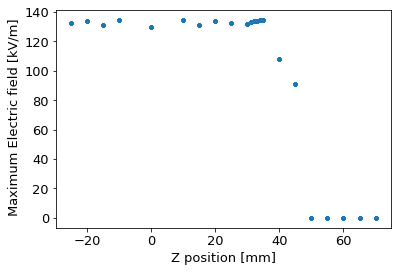

In [8]:
def Extract2(first):
    return [item[1] for item in first]

max_fields = Extract(max_e_fields)
max_fields_locations = Extract2(max_e_fields)

plt.plot(max_fields_locations, max_fields, '.')
plt.xlabel('Z position [mm]')
plt.ylabel(' Maximum Electric field [kV/m]')